ディレクトリ構成：  
```
./
├train_seq2seq.ipynb(このファイル)
├model/
│   └(モデルパラメータキャッシュファイル)
├dataset/
├result/
│   └(実行結果CSVと学習曲線グラフ画像)
└src/
   ├common/
   ├dataset/
   ├attention_layer.py
   ├attention_seq2seq.py
   ├peeky_seq2seq.py
   └seq2seq.py
```

In [612]:
# 変数の全消去
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# coding: utf-8
import sys
sys.path.append("./src")
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from dataset.sequence import TextSequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
from attention_seq2seq import AttentionSeq2seq

In [2]:
# matplotlibのインライン表示
%matplotlib inline
# モジュールの更新時に自動で再読み込み
%reload_ext autoreload
%autoreload 2

In [3]:
# ファイルパスの設定
dataset_dir =Path('./src/dataset')
# source_csv = dataset_dir / "addition.csv"
# source_csv = dataset_dir / "interpretation_train43_and_test40.csv"
source_csv = dataset_dir / "interpretation_excel_concat_trim.csv"
result_dir = Path('./result')
model_dir = Path('./model')
dataset_name = source_csv.stem
encoding = "utf-8"

In [583]:
# 最初から訓練データとテストデータが分かれているときはこっち
source_csv = dataset_dir /"interpretation_excel.csv"  # 結果ファイル名に用いる
train_csv = dataset_dir / "interpretation_excel_train_trim.csv"
test_csv = dataset_dir / "interpretation_excel_validation_trim.csv"

### 前処理
#### データセット読み込みと文字IDベクトルへの変換

In [4]:
# TextSequenceクラスからCSV読み込み
seq = TextSequence()
seq.read_csv(source_csv)
char_to_id, id_to_char = seq.vocab

In [584]:
# 最初から訓練データとテストデータが分かれているときはこっち
seq = TextSequence()
seq.read_csv(train_csv)
x_train, t_train = seq.shuffle(seed=1)
seq.read_csv(test_csv, vocab_init=False)
x_test, t_test = seq.shuffle(seed=1)
char_to_id, id_to_char = seq.vocab

#### ハイパーパラメータ設定とデータ前処理

In [21]:
# ハイパーパラメータ
vocab_size = len(char_to_id)
wordvec_size = 64
hidden_size = 128
batch_size = 32
max_epoch = 100
max_grad = 5.0

In [11]:
# データセット分割
x_train, x_test, t_train, t_test = seq.split_data(seed=1, test_size=0.1)

#### model, optimizer, trainerインスタンス作成

In [33]:
# モデル選択
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)

In [31]:
# OptimizerとTrainerインスタンスの初期化
optimizer = Adam()
trainer = Trainer(model, optimizer)

### 学習実行

In [32]:
# Train
trainer.fit(x_train[:, ::-1], t_train, x_test[:, ::-1], t_test,
            max_epoch=max_epoch,
            batch_size=batch_size,
            max_grad=max_grad)

| epoch 1 |  iter 1 / 19 | time 0[s] | loss 5.68
| epoch 1 | loss 5.68098
| epoch 1 | train error 1.00000
| epoch 1 | test error  1.00000
| epoch 2 |  iter 1 / 19 | time 4[s] | loss 4.42
| epoch 2 | loss 4.42120
| epoch 2 | train error 1.00000
| epoch 2 | test error  1.00000
| epoch 3 |  iter 1 / 19 | time 8[s] | loss 2.66
| epoch 3 | loss 2.66496
| epoch 3 | train error 1.00000
| epoch 3 | test error  1.00000
| epoch 4 |  iter 1 / 19 | time 12[s] | loss 2.27
| epoch 4 | loss 2.27309
| epoch 4 | train error 1.00000
| epoch 4 | test error  1.00000
| epoch 5 |  iter 1 / 19 | time 16[s] | loss 2.05
| epoch 5 | loss 2.05224
| epoch 5 | train error 1.00000
| epoch 5 | test error  1.00000
| epoch 6 |  iter 1 / 19 | time 20[s] | loss 1.90
| epoch 6 | loss 1.89938
| epoch 6 | train error 1.00000
| epoch 6 | test error  1.00000
| epoch 7 |  iter 1 / 19 | time 24[s] | loss 1.80
| epoch 7 | loss 1.79798
| epoch 7 | train error 1.00000
| epoch 7 | test error  1.00000
| epoch 8 |  iter 1 / 19 | tim

| epoch 58 | loss 0.07705
| epoch 58 | train error 0.39448
| epoch 58 | test error  0.57971
| epoch 59 |  iter 1 / 19 | time 234[s] | loss 0.08
| epoch 59 | loss 0.07706
| epoch 59 | train error 0.39286
| epoch 59 | test error  0.50725
| epoch 60 |  iter 1 / 19 | time 238[s] | loss 0.07
| epoch 60 | loss 0.07026
| epoch 60 | train error 0.40584
| epoch 60 | test error  0.55072
| epoch 61 |  iter 1 / 19 | time 242[s] | loss 0.07
| epoch 61 | loss 0.07398
| epoch 61 | train error 0.41234
| epoch 61 | test error  0.55072
| epoch 62 |  iter 1 / 19 | time 246[s] | loss 0.07
| epoch 62 | loss 0.07254
| epoch 62 | train error 0.36851
| epoch 62 | test error  0.49275
| epoch 63 |  iter 1 / 19 | time 251[s] | loss 0.07
| epoch 63 | loss 0.06764
| epoch 63 | train error 0.34578
| epoch 63 | test error  0.44928
| epoch 64 |  iter 1 / 19 | time 255[s] | loss 0.07
| epoch 64 | loss 0.06552
| epoch 64 | train error 0.33604
| epoch 64 | test error  0.47826
| epoch 65 |  iter 1 / 19 | time 259[s] | lo

### 推論

In [606]:
# Inference
start_id = seq.start_id
sample_size = seq.t_length
guess_train = model.generate(x_train[:, ::-1], start_id, sample_size)
guess_test = model.generate(x_test[:, ::-1], start_id, sample_size)

### 結果の保存

In [608]:
# 保存ファイルのファイル名生成
modelname = model.__class__.__name__
timestamp = datetime.now().strftime("_%y%m%d_%H%M")
save_dir = result_dir / (dataset_name + timestamp)
os.makedirs(save_dir, exist_ok=True)

In [609]:
# Save result as csv
result_train_csv = save_dir /  ("result_" + dataset_name + "_" + modelname + "_train.csv")
result_test_csv = save_dir / ("result_" + dataset_name + "_" + modelname + "_test.csv")
df_result_train = seq.result_to_csv(result_train_csv, x_train, t_train, guess_train, encoding=encoding)
df_result_test = seq.result_to_csv(result_test_csv, x_test, t_test, guess_test, encoding=encoding)

Accuracy: 0.9025974025974026
Accuracy: 0.7246376811594203


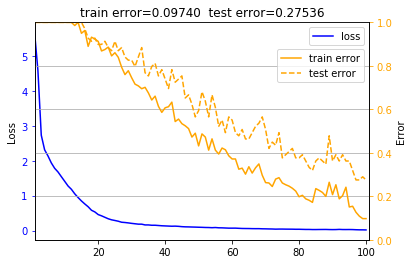

In [610]:
# Plot learning curve and save it as png image
image_path = save_dir / ('result_' + dataset_name + "_" + modelname + '.png')
trainer.plot(image_path=image_path)

In [611]:
# Save parameters
pickle_path = model_dir / (dataset_name + "_" + modelname + '_epoch' + str(max_epoch) + timestamp + '.pkl')
model.save_params(file_name=pickle_path)

## 確信度の取得

In [177]:
model.load_params(file_name=str(pickle_path))

In [484]:
# Inference with certainty factor
start_id = seq.start_id
sample_size = seq.t_length
guess_train, cf_train = model.generate_with_cf(x_train[:, ::-1], start_id, sample_size)
guess_test, cf_test = model.generate_with_cf(x_test[:, ::-1], start_id, sample_size)

In [485]:
# 保存ファイルのファイル名生成
modelname = model.__class__.__name__
timestamp = datetime.now().strftime("_%y%m%d_%H%M")
save_dir = result_dir / (dataset_name + timestamp)
os.makedirs(save_dir, exist_ok=True)

In [488]:
# Save result as csv
result_train_csv = save_dir /  ("result_" + dataset_name + "_" + modelname + "_train.csv")
result_test_csv = save_dir / ("result_" + dataset_name + "_" + modelname + "_test.csv")
df_result_train = seq.result_to_csv(result_train_csv, x_train, t_train, guess_train, cf=cf_train, encoding=encoding)
df_result_test = seq.result_to_csv(result_test_csv, x_test, t_test, guess_test, cf=cf_test, encoding=encoding)

Accuracy: 0.898471615720524
Accuracy: 0.8627450980392157


In [109]:
def cf_filter(df):
    for factor in np.arange(0.90, 1.00, 0.01):
        print("cf={:.2f}".format(factor))
        print(" correct   :", df.query('correct == 1 and cf < {}'.format(factor)).shape[0])
        print(" incorrect :", df.query('correct == 0 and cf < {}'.format(factor)).shape[0])

In [342]:
cf_filter(df_result_train)

cf=0.90
 correct   : 4
 incorrect : 5
cf=0.91
 correct   : 4
 incorrect : 5
cf=0.92
 correct   : 5
 incorrect : 5
cf=0.93
 correct   : 7
 incorrect : 7
cf=0.94
 correct   : 7
 incorrect : 7
cf=0.95
 correct   : 12
 incorrect : 16
cf=0.96
 correct   : 19
 incorrect : 20
cf=0.97
 correct   : 40
 incorrect : 30
cf=0.98
 correct   : 93
 incorrect : 56
cf=0.99
 correct   : 223
 incorrect : 80


In [277]:
cf_filter(df_result_test)

cf=0.90
 correct   : 0
 incorrect : 0
cf=0.91
 correct   : 0
 incorrect : 0
cf=0.92
 correct   : 0
 incorrect : 0
cf=0.93
 correct   : 0
 incorrect : 0
cf=0.94
 correct   : 0
 incorrect : 0
cf=0.95
 correct   : 0
 incorrect : 0
cf=0.96
 correct   : 0
 incorrect : 0
cf=0.97
 correct   : 0
 incorrect : 0
cf=0.98
 correct   : 0
 incorrect : 0
cf=0.99
 correct   : 88
 incorrect : 14


In [430]:
corrects = df_result_train['correct'].value_counts()
corrects

1    823
0     93
Name: correct, dtype: int64

In [196]:
def accuracy(df, cf):
    df_passed = df.query('cf > {}'.format(cf))
    if len(df_passed) > 0:
        nb_corrects = df_passed['correct'].value_counts()[1]
        return nb_corrects / len(df_passed)
    else:
        return 0

In [135]:
def passing_rate(df, cf):
    nb_passing = len(df.query('cf >= {}'.format(cf)))
    return nb_passing / len(df)

In [526]:
accuracy(df_result_test, 0.992)

0.9827586206896551

In [527]:
passing_rate(df_result_test, 0.992)

0.5686274509803921

In [489]:
def accuracy_by_cf(df):
    acc_list = []
    pr_list = []
    for cf in np.arange(0.90, 1.00, 0.001):
#         print("cf={:.2f}".format(cf))
        acc = accuracy(df, cf)
        pr  = passing_rate(df, cf)
#         print("  Accuracy     :", acc)
#         print("  Passing rate :", pr)
        acc_list.append(acc)
        pr_list.append(pr)
    return acc_list, pr_list

In [490]:
acc_train, pr_train = accuracy_by_cf(df_result_train)

In [491]:
acc_test, pr_test = accuracy_by_cf(df_result_test)

[]

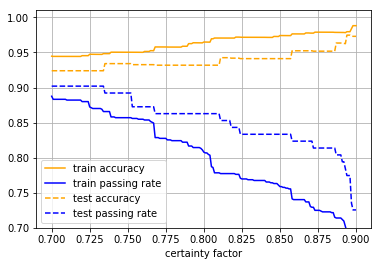

In [469]:
x = np.arange(0.90, 1.00, 0.001)
fig, ax = plt.subplots()
color_acc = 'orange'
color_pr = 'blue'
ax.plot(x, acc_train, color=color_acc, label='train accuracy')
ax.plot(x, pr_train, color=color_pr, label='train passing rate')
ax.plot(x, acc_test, color=color_acc, linestyle='dashed', label='test accuracy')
ax.plot(x, pr_test, color=color_pr, linestyle='dashed', label='test passing rate')
ax.grid(True)
plt.xlabel('certainty factor')
ax.set_ylim(0.7, 1.01)
ax.legend()
plt.savefig('./accuracy_and_passing-rate.png')
plt.plot()